<a href="https://colab.research.google.com/github/gokberksen/gokberksen_MPA-MLF/blob/main/MPA_MLF_PCA_2_students_(gb).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA through Singular Value Decomposition

In [10]:
import numpy as np

# Defined 3 points in 2D-space:
X = np.array([[2, 1, 0], [4, 3, 0]])

# Calculate the covariance matrix:
X_mean = X - np.mean(X, axis=1, keepdims=True)  # Centering the data
R = np.cov(X_mean)  # Covariance matrix

# Calculate the SVD decomposition and new basis vectors:
[U, D, V] = np.linalg.svd(R)  # call SVD decomposition
u1 = U[:, 0]  # new basis vectors
u2 = U[:, 1]

# Calculate the coordinates in new orthonormal basis:
Xi = np.dot(U.T, X_mean)  # Transform to new basis

# Calculate the approximation of the original from new basis
X_approx = np.dot(U, Xi) + np.mean(X, axis=1, keepdims=True)  # Reconstruct original

# Check that you got the original
print("Original X:")
print(X)
print("Reconstructed X:")
print(X_approx)


Original X:
[[2 1 0]
 [4 3 0]]
Reconstructed X:
[[2.00000000e+00 1.00000000e+00 7.77156117e-16]
 [4.00000000e+00 3.00000000e+00 0.00000000e+00]]


# PCA on Iris data

In [ ]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

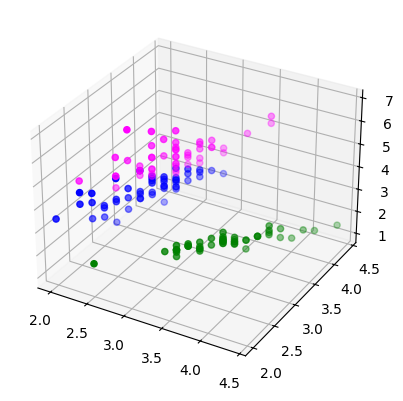

In [ ]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show


[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]
[2.93808505 0.9201649  0.14774182]
[0.72962445 0.22850762 0.03668922]


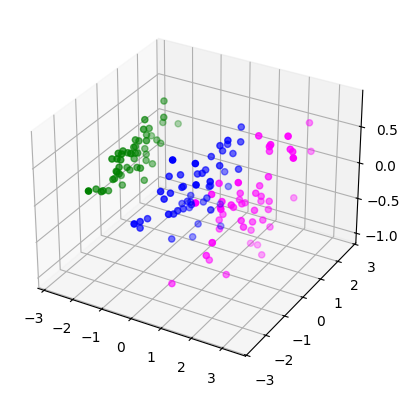

In [ ]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn import decomposition
Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)

# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp) # ne anlama geliyor
Xpca = pca.transform(Xpp)
print(pca.get_covariance())
# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show
print(pca.explained_variance_)   #3özellik varience gösteriyor
print(pca.explained_variance_ratio_)


In [ ]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [ ]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

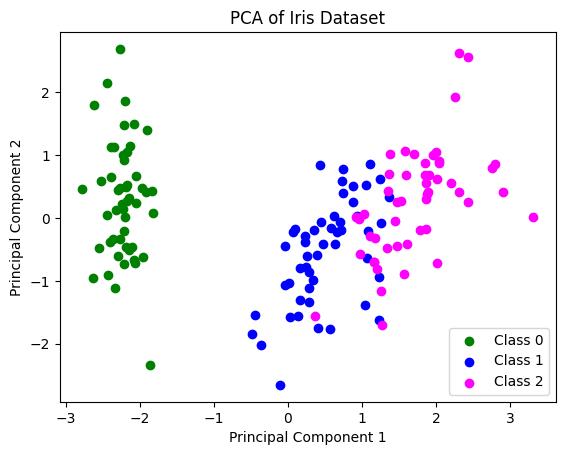

In [11]:
# Plot the principal components in 2D, marking different targets in color
plt.figure()
plt.scatter(Xpca[y == 0, 0], Xpca[y == 0, 1], color='green', label='Class 0')
plt.scatter(Xpca[y == 1, 0], Xpca[y == 1, 1], color='blue', label='Class 1')
plt.scatter(Xpca[y == 2, 0], Xpca[y == 2, 1], color='magenta', label='Class 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of Iris Dataset')
plt.show()


# KNN classifier

[[14  1  0]
 [ 0 12  2]
 [ 0  1 15]]


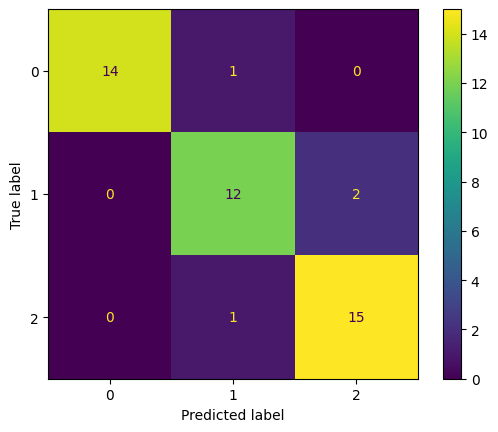

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xpp, y, test_size=0.3)

# Initialize and train KNN classifier
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)

# Make predictions
Y_pred = knn1.predict(X_test)

# Compute and display the confusion matrix
cm = confusion_matrix(y_test, Y_pred)
print(cm)
ConfusionMatrixDisplay.from_predictions(y_test, Y_pred)


[[13  0  0]
 [ 0 19  4]
 [ 0  1  8]]


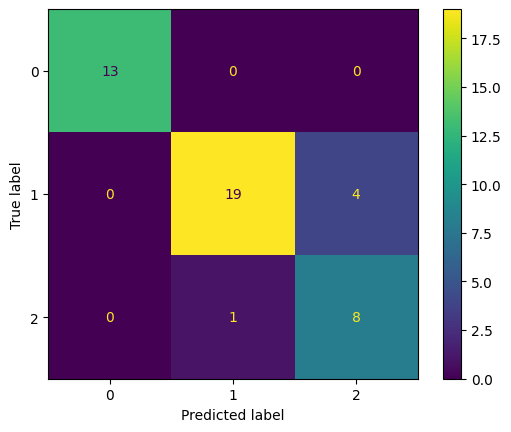

In [61]:
from sklearn.decomposition import PCA

# Apply PCA, keeping only the first two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(Xpp)

# Split PCA-transformed data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3)

# Initialize and train KNN classifier on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train_pca)

# Make predictions
y_pred_pca = knn_pca.predict(X_test_pca)

# Compute and display the confusion matrix
cm_pca = confusion_matrix(y_test_pca, y_pred_pca)
print(cm_pca)
ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_pca)


[[13  0  0]
 [ 0  9 10]
 [ 0  4  9]]


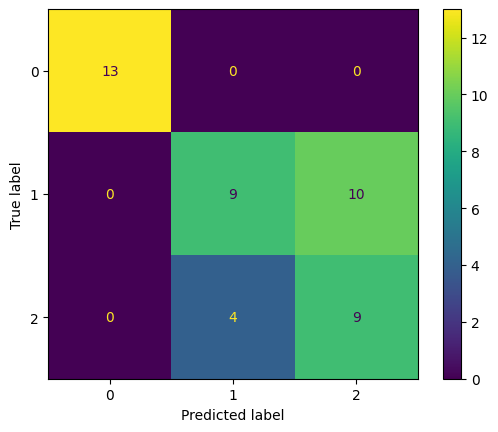

In [63]:
# Use only the first two columns of the original dataset
X_2d = Xpp[:, :2]

# Split the 2D data into training and testing sets
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.3)

# Initialize and train KNN classifier on 2D data
knn_2d = KNeighborsClassifier(n_neighbors=3)
knn_2d.fit(X_train_2d, y_train_2d)

# Make predictions
y_pred_2d = knn_2d.predict(X_test_2d)

# Compute and display the confusion matrix
cm_2d = confusion_matrix(y_test_2d, y_pred_2d)
print(cm_2d)
ConfusionMatrixDisplay.from_predictions(y_test_2d, y_pred_2d)
